## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 20 column and 10841 rows.

### Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Featur eEngineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  str    
 1   Category        10841 non-null  str    
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  str    
 4   Size            10841 non-null  str    
 5   Installs        10841 non-null  str    
 6   Type            10840 non-null  str    
 7   Price           10841 non-null  str    
 8   Content Rating  10840 non-null  str    
 9   Genres          10841 non-null  str    
 10  Last Updated    10841 non-null  str    
 11  Current Ver     10833 non-null  str    
 12  Android Ver     10838 non-null  str    
dtypes: float64(1), str(12)
memory usage: 1.1 MB


In [5]:
##summary of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
##Missing Values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Insights and observation
The dataset has msising values

In [7]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## Data Cleaning

In [8]:
df['Reviews'].unique()

<StringArray>
[   '159',    '967',  '87510', '215644',    '167',    '178',  '36815',
  '13791',    '121',  '13880',
 ...
   '2036',  '56496', '376223',    '785',   '5775',    '885',  '88486',
    '603',   '1195', '398307']
Length: 6002, dtype: str

In [9]:
df_copy=df

In [10]:
df['Reviews']=df['Reviews'].replace({'3.0M':'3000000'})

In [12]:
df['Reviews'].str.isnumeric().sum()

np.int64(10841)

In [13]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [14]:
## Convert Review Datatype to int
df['Reviews']=df['Reviews'].astype(int)

In [17]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  str    
 1   Category        10841 non-null  str    
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  str    
 5   Installs        10841 non-null  str    
 6   Type            10840 non-null  str    
 7   Price           10841 non-null  str    
 8   Content Rating  10840 non-null  str    
 9   Genres          10841 non-null  str    
 10  Last Updated    10841 non-null  str    
 11  Current Ver     10833 non-null  str    
 12  Android Ver     10838 non-null  str    
dtypes: float64(1), int64(1), str(11)
memory usage: 1.1 MB


In [18]:
df['Size'].unique()

<StringArray>
[  '19M',   '14M',  '8.7M',   '25M',  '2.8M',  '5.6M',   '29M',   '33M',
  '3.1M',   '28M',
 ...
  '467k',  '157k',   '44k',  '676k',   '67k',  '552k',  '885k', '1020k',
  '582k',  '619k']
Length: 462, dtype: str

In [19]:
df['Size'].isnull().sum()

np.int64(0)

In [ ]:
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M','')) * 1024
        elif 'k' in size:
            return float(size.replace('k',''))
    return np.nan

df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].apply(convert_size)
df.rename(columns={'Size': 'Size_KB'}, inplace=True)

In [26]:
df['Size_KB'] = df['Size_KB'].astype(float)
df

,App,Category,Rating,Reviews,Size_KB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [28]:
df['Size_KB']=df['Size_KB'].replace('1,000+','1000')

In [29]:
df['Size_KB']=df['Size_KB'].astype(float)

In [30]:
df['Size_KB']

0        19456.0
1        14336.0
2         8908.8
3        25600.0
4         2867.2
          ...   
10836    54272.0
10837     3686.4
10838     9728.0
10839        NaN
10840    19456.0
Name: Size_KB, Length: 10841, dtype: float64

In [31]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  str    
 1   Category        10841 non-null  str    
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_KB         9145 non-null   float64
 5   Installs        10841 non-null  str    
 6   Type            10840 non-null  str    
 7   Price           10841 non-null  str    
 8   Content Rating  10840 non-null  str    
 9   Genres          10841 non-null  str    
 10  Last Updated    10841 non-null  str    
 11  Current Ver     10833 non-null  str    
 12  Android Ver     10838 non-null  str    
dtypes: float64(2), int64(1), str(10)
memory usage: 1.1 MB


In [32]:
df['Installs'].unique()

<StringArray>
[       '10,000+',       '500,000+',     '5,000,000+',    '50,000,000+',
       '100,000+',        '50,000+',     '1,000,000+',    '10,000,000+',
         '5,000+',   '100,000,000+', '1,000,000,000+',         '1,000+',
   '500,000,000+',            '50+',           '100+',           '500+',
            '10+',             '1+',             '5+',             '0+',
              '0',           'Free']
Length: 22, dtype: str

In [33]:
df['Price'].unique()

<StringArray>
[       '0',    '$4.99',    '$3.99',    '$6.99',    '$1.49',    '$2.99',
    '$7.99',    '$5.99',    '$3.49',    '$1.99',    '$9.99',    '$7.49',
    '$0.99',    '$9.00',    '$5.49',   '$10.00',   '$24.99',   '$11.99',
   '$79.99',   '$16.99',   '$14.99',    '$1.00',   '$29.99',   '$12.99',
    '$2.49',   '$10.99',    '$1.50',   '$19.99',   '$15.99',   '$33.99',
   '$74.99',   '$39.99',    '$3.95',    '$4.49',    '$1.70',    '$8.99',
    '$2.00',    '$3.88',   '$25.99',  '$399.99',   '$17.99',  '$400.00',
    '$3.02',    '$1.76',    '$4.84',    '$4.77',    '$1.61',    '$2.50',
    '$1.59',    '$6.49',    '$1.29',    '$5.00',   '$13.99',  '$299.99',
  '$379.99',   '$37.99',   '$18.99',  '$389.99',   '$19.90',    '$8.49',
    '$1.75',   '$14.00',    '$4.85',   '$46.99',  '$109.99',  '$154.99',
    '$3.08',    '$2.59',    '$4.80',    '$1.96',   '$19.40',    '$3.90',
    '$4.59',   '$15.46',    '$3.04',    '$4.29',    '$2.60',    '$3.28',
    '$4.60',   '$28.99',    '$2.95', 

In [34]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df[cols]=df[cols].str.replace(item,'')

In [36]:
df.loc[df['Price'] == 'Everyone', 'Price'] = '0'


In [37]:
df.loc[df['Installs'] == 'Free', 'Installs'] = np.nan


In [38]:
df['Installs'].unique()

<StringArray>
[     '10000',     '500000',    '5000000',   '50000000',     '100000',
      '50000',    '1000000',   '10000000',       '5000',  '100000000',
 '1000000000',       '1000',  '500000000',         '50',        '100',
        '500',         '10',          '1',          '5',          '0',
          nan]
Length: 21, dtype: str

In [39]:
df['Price'].unique()

<StringArray>
[     '0',   '4.99',   '3.99',   '6.99',   '1.49',   '2.99',   '7.99',
   '5.99',   '3.49',   '1.99',   '9.99',   '7.49',   '0.99',   '9.00',
   '5.49',  '10.00',  '24.99',  '11.99',  '79.99',  '16.99',  '14.99',
   '1.00',  '29.99',  '12.99',   '2.49',  '10.99',   '1.50',  '19.99',
  '15.99',  '33.99',  '74.99',  '39.99',   '3.95',   '4.49',   '1.70',
   '8.99',   '2.00',   '3.88',  '25.99', '399.99',  '17.99', '400.00',
   '3.02',   '1.76',   '4.84',   '4.77',   '1.61',   '2.50',   '1.59',
   '6.49',   '1.29',   '5.00',  '13.99', '299.99', '379.99',  '37.99',
  '18.99', '389.99',  '19.90',   '8.49',   '1.75',  '14.00',   '4.85',
  '46.99', '109.99', '154.99',   '3.08',   '2.59',   '4.80',   '1.96',
  '19.40',   '3.90',   '4.59',  '15.46',   '3.04',   '4.29',   '2.60',
   '3.28',   '4.60',  '28.99',   '2.95',   '2.90',   '1.97', '200.00',
  '89.99',   '2.56',  '30.99',   '3.61', '394.99',   '1.26',   '1.20',
   '1.04']
Length: 92, dtype: str

In [40]:
# df['Installs']=df['Installs'].astype('int')
df['Price']=df['Price'].astype('float')

In [41]:
df['Installs'] = df['Installs'].astype('Int64')


In [42]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  str    
 1   Category        10841 non-null  str    
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_KB         9145 non-null   float64
 5   Installs        10840 non-null  Int64  
 6   Type            10840 non-null  str    
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  str    
 9   Genres          10841 non-null  str    
 10  Last Updated    10841 non-null  str    
 11  Current Ver     10833 non-null  str    
 12  Android Ver     10838 non-null  str    
dtypes: Int64(1), float64(3), int64(1), str(8)
memory usage: 1.1 MB


In [43]:
## Handlling Last update feature
df['Last Updated'].unique()

<StringArray>
[   'January 7, 2018',   'January 15, 2018',     'August 1, 2018',
       'June 8, 2018',      'June 20, 2018',     'March 26, 2017',
     'April 26, 2018',      'June 14, 2018', 'September 20, 2017',
       'July 3, 2018',
 ...
  'November 23, 2015',      'June 17, 2012',  'February 27, 2015',
  'December 18, 2013',   'February 6, 2012',  'November 25, 2014',
       'May 19, 2016',   'January 20, 2014',  'February 16, 2014',
     'March 23, 2014']
Length: 1378, dtype: str

In [44]:
df['Last Updated']=pd.to_datetime(df['Last Updated'], errors='coerce')
df['Day']=df['Last Updated'].dt.day
df['Month']=df['Last Updated'].dt.month
df['Year']=df['Last Updated'].dt.year

In [45]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  str           
 1   Category        10841 non-null  str           
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  int64         
 4   Size_KB         9145 non-null   float64       
 5   Installs        10840 non-null  Int64         
 6   Type            10840 non-null  str           
 7   Price           10841 non-null  float64       
 8   Content Rating  10840 non-null  str           
 9   Genres          10841 non-null  str           
 10  Last Updated    10840 non-null  datetime64[us]
 11  Current Ver     10833 non-null  str           
 12  Android Ver     10838 non-null  str           
 13  Day             10840 non-null  float64       
 14  Month           10840 non-null  float64       
 15  Year         

In [46]:
df.head()

,App,Category,Rating,Reviews,Size_KB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15.0,1.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1.0,8.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8.0,6.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20.0,6.0,2018.0


In [47]:
df.to_csv('playstore_cleaned.csv')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, drop='first')
encoded = ohe.fit_transform(df[['Category', 'Content Rating']])

encoded_df = pd.DataFrame(
    encoded,
    columns=ohe.get_feature_names_out(['Category', 'Content Rating'])
)

df = df.drop(['Category', 'Content Rating','Type','Genres'], axis=1)
df = pd.concat([df, encoded_df], axis=1)

## EDA


In [48]:
df.head()

,App,Category,Rating,Reviews,Size_KB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15.0,1.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1.0,8.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8.0,6.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20.0,6.0,2018.0


In [49]:
df[df.duplicated('App')].shape

(1181, 16)

## Observation
The dataset has duplicate records

In [50]:
df=df.drop_duplicates(subset=['App'],keep='first')

In [51]:
df.shape

(9660, 16)

## Explore Data

In [52]:
numeric_features = df.select_dtypes(
    include=['int64', 'Int64', 'float64']
).columns.tolist()

categorical_features = df.select_dtypes(
    include=['str']
).columns.tolist()

datetime_features = df.select_dtypes(
    include=['datetime']
).columns.tolist()


print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"\nWe have {len(categorical_features)} categorical features: {categorical_features}")
print(f"\nWe have {len(datetime_features)} datetime features: {datetime_features}")



We have 8 numerical features: ['Rating', 'Reviews', 'Size_KB', 'Installs', 'Price', 'Day', 'Month', 'Year']

We have 7 categorical features: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']

We have 1 datetime features: ['Last Updated']


In [53]:
df.info()

<class 'pandas.DataFrame'>
Index: 9660 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   str           
 1   Category        9660 non-null   str           
 2   Rating          8197 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size_KB         8432 non-null   float64       
 5   Installs        9659 non-null   Int64         
 6   Type            9659 non-null   str           
 7   Price           9660 non-null   float64       
 8   Content Rating  9659 non-null   str           
 9   Genres          9660 non-null   str           
 10  Last Updated    9659 non-null   datetime64[us]
 11  Current Ver     9652 non-null   str           
 12  Android Ver     9657 non-null   str           
 13  Day             9659 non-null   float64       
 14  Month           9659 non-null   float64       
 15  Year            965

## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [54]:
## Proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('---------------------------')

App
Photo Editor & Candy Camera & Grid & ScrapBook        0.010352
Coloring book moana                                   0.010352
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010352
Sketch - Draw & Paint                                 0.010352
Pixel Draw - Number Art Coloring Book                 0.010352
                                                        ...   
Sya9a Maroc - FR                                      0.010352
Fr. Mike Schmitz Audio Teachings                      0.010352
Parkinson Exercices FR                                0.010352
The SCP Foundation DB fr nn5n                         0.010352
iHoroscope - 2018 Daily Horoscope & Astrology         0.010352
Name: proportion, Length: 9660, dtype: float64
---------------------------
Category
FAMILY                 18.964803
GAME                    9.927536
TOOLS                   8.561077
BUSINESS                4.347826
MEDICAL                 4.089027
PERSONALIZATION         3.892340
PRODUCTIVITY         

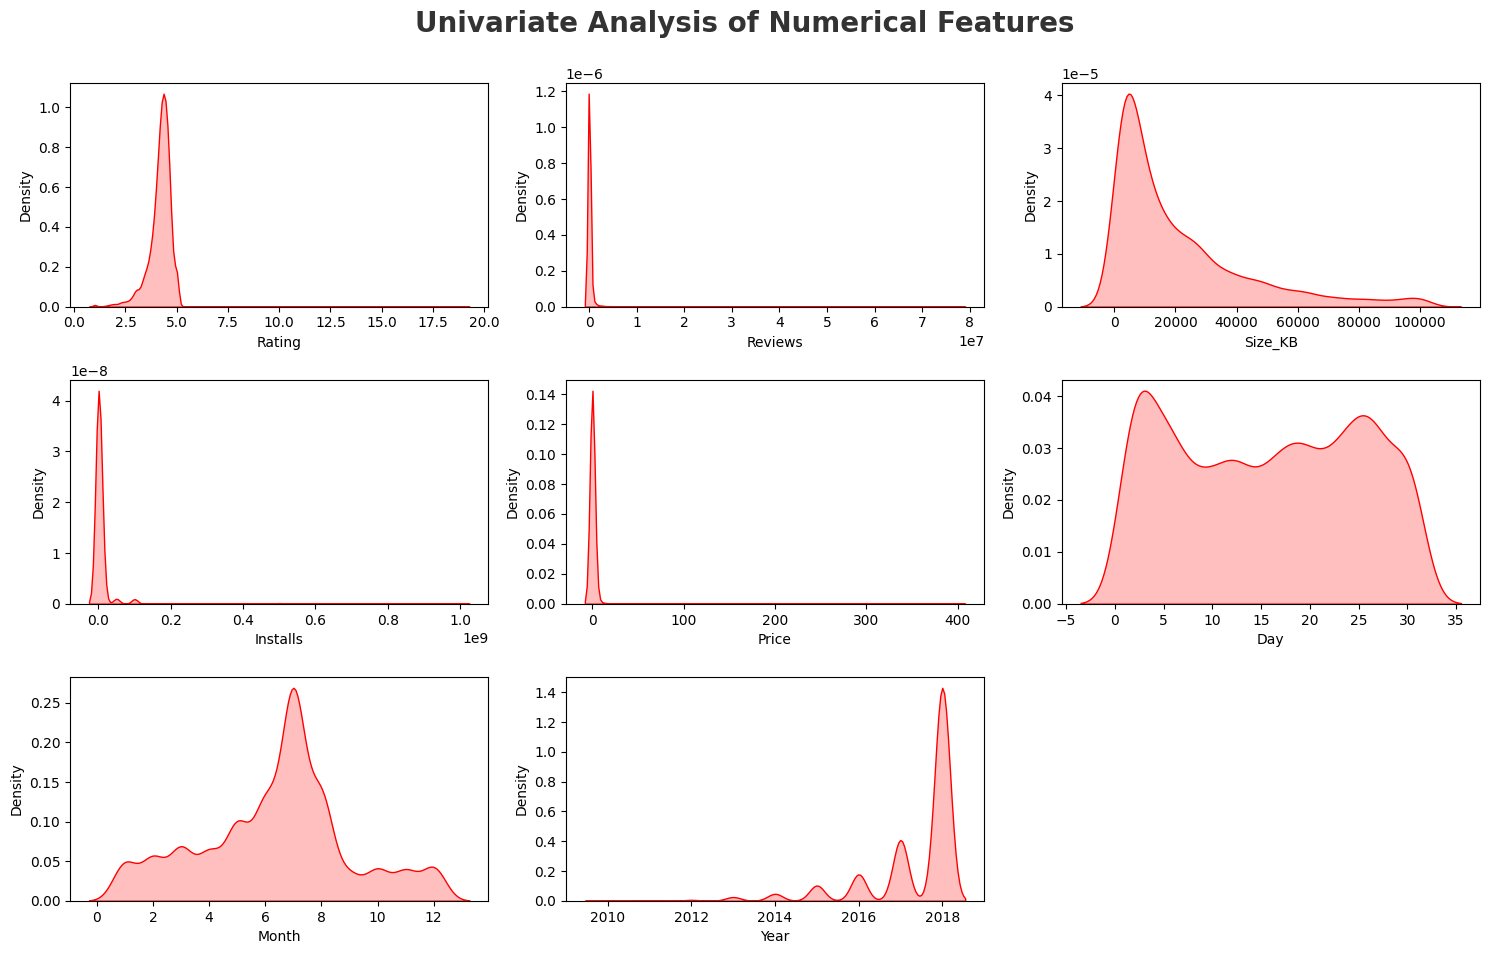

In [55]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Observations
- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

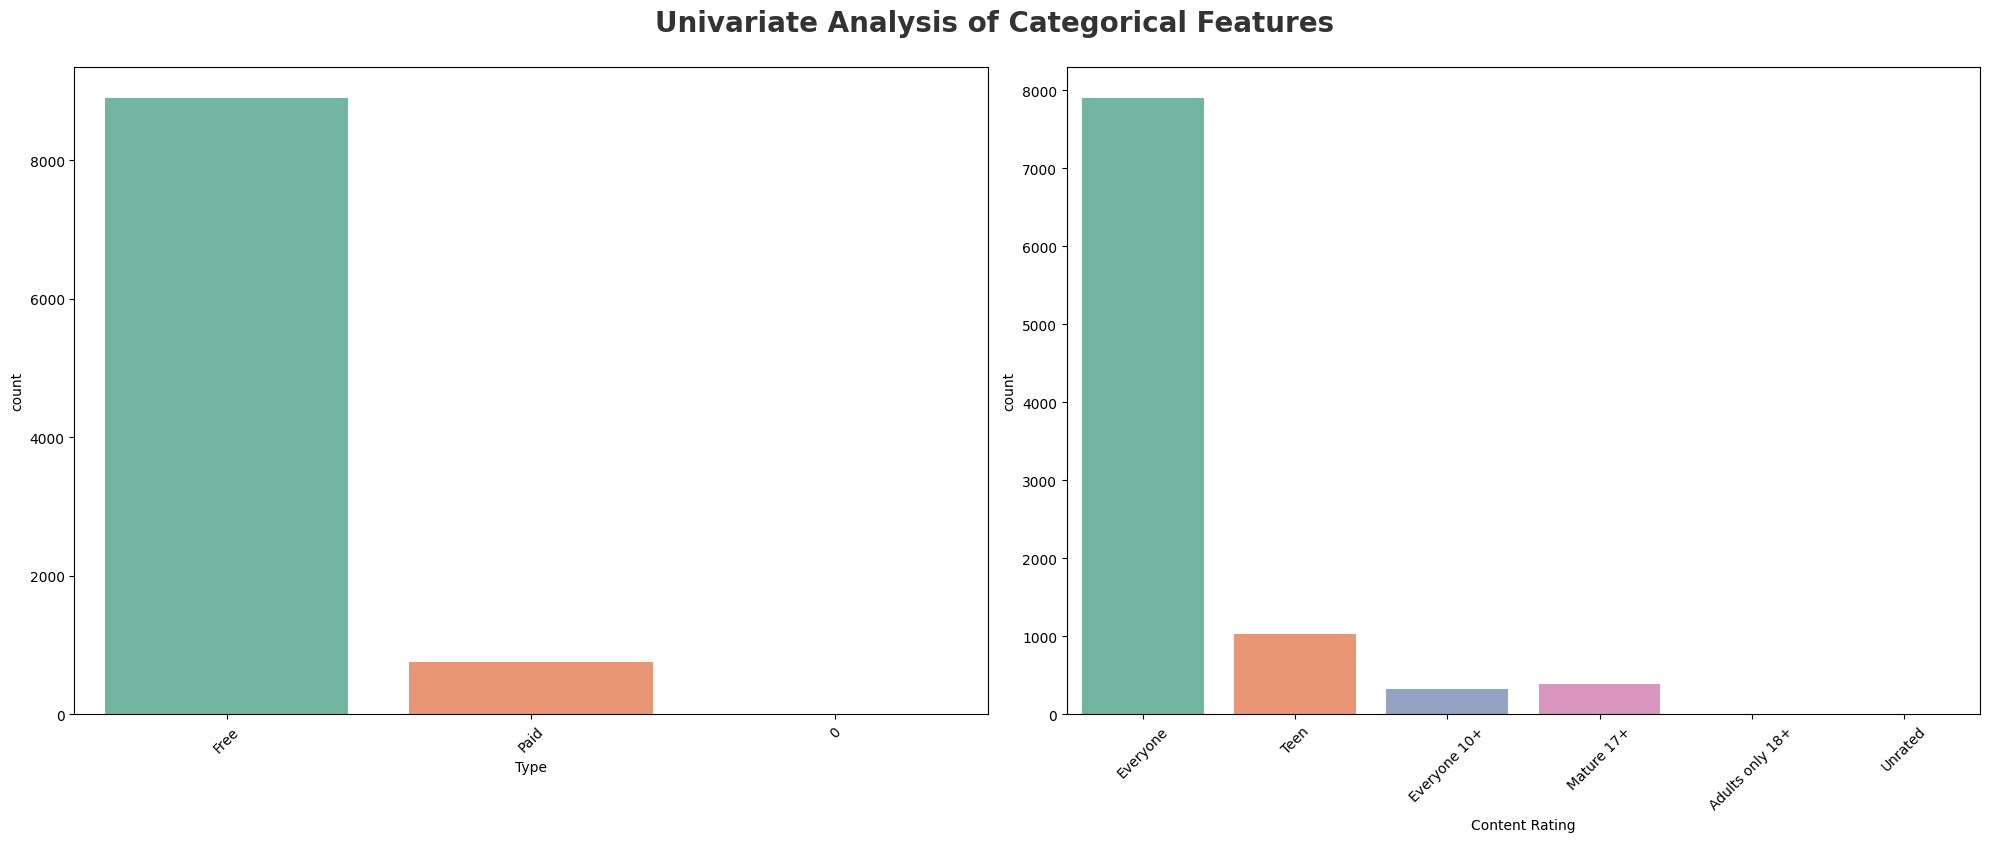

In [56]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

## Which is the most popular app category?

In [57]:
df.head(2)

,App,Category,Rating,Reviews,Size_KB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15.0,1.0,2018.0


<Axes: >

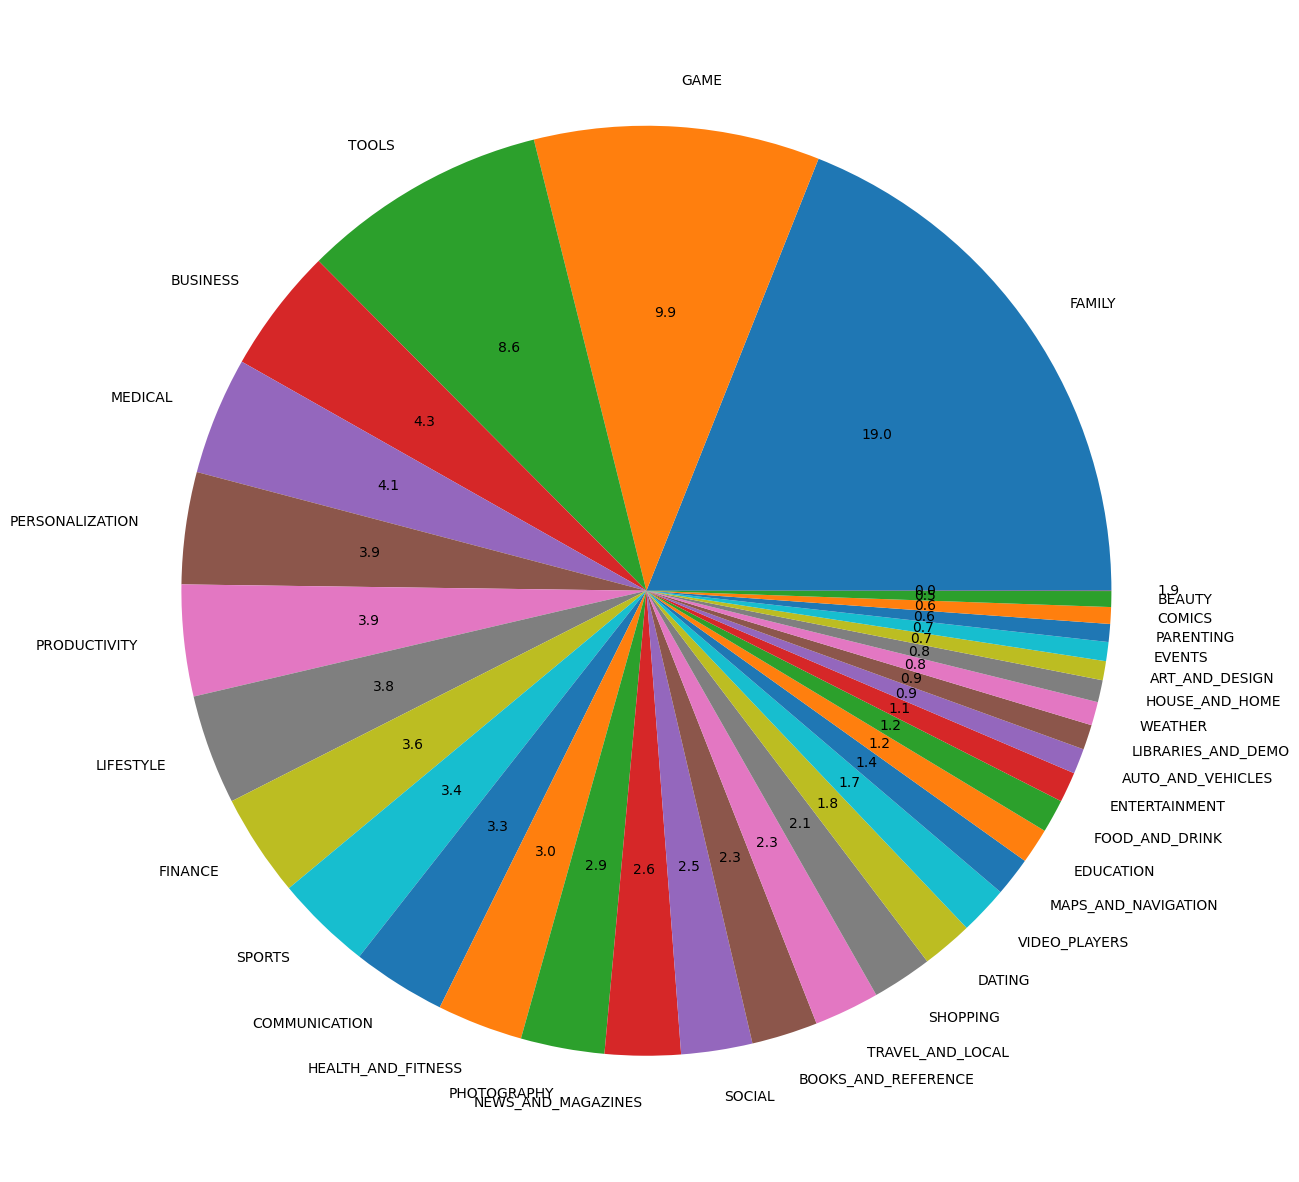

In [58]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,16),autopct='%1.1f')

## Observations

1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

In [59]:
## Top 10 App Categories
category = pd.DataFrame(df['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

In [60]:
category = df['Category'].value_counts().to_frame(name='Count')

In [61]:
category

,Count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


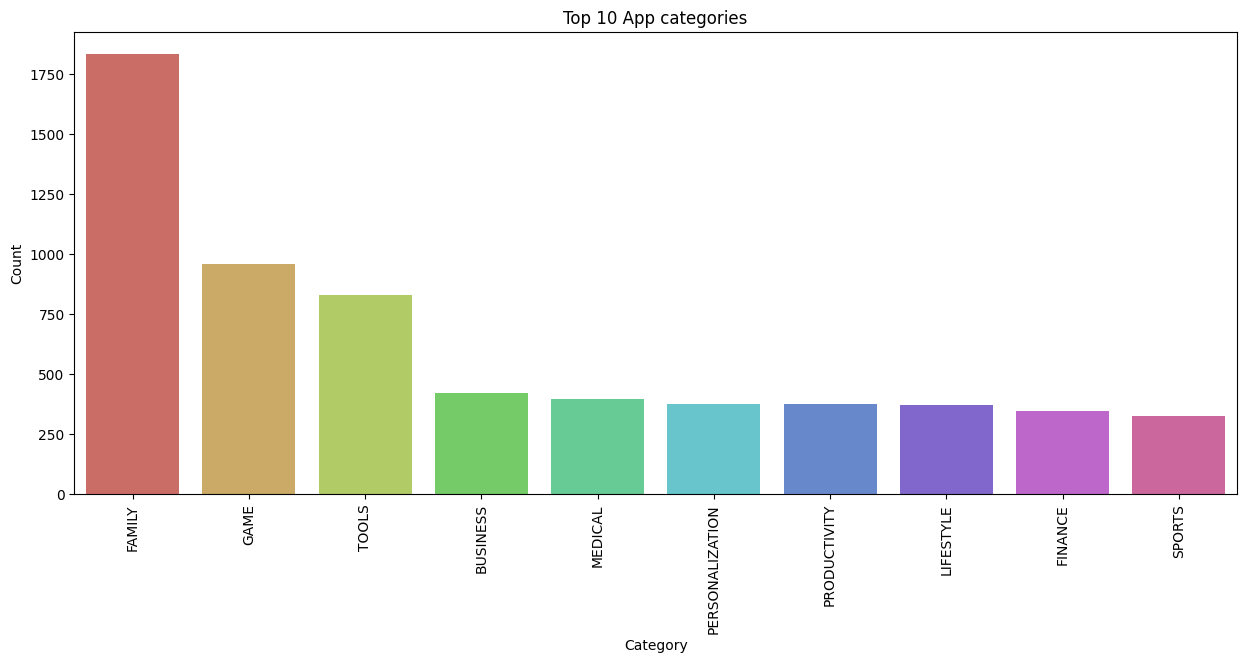

In [62]:
## top 10 app
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='Count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

## Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

## Internal Assignments
1. Which Category has largest number of installations??
2. What are the Top 5 most installed Apps in Each popular Categories ??
3. How many apps are there on Google Play Store which get 5 ratings??

## Which Category has largest number of installations??

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

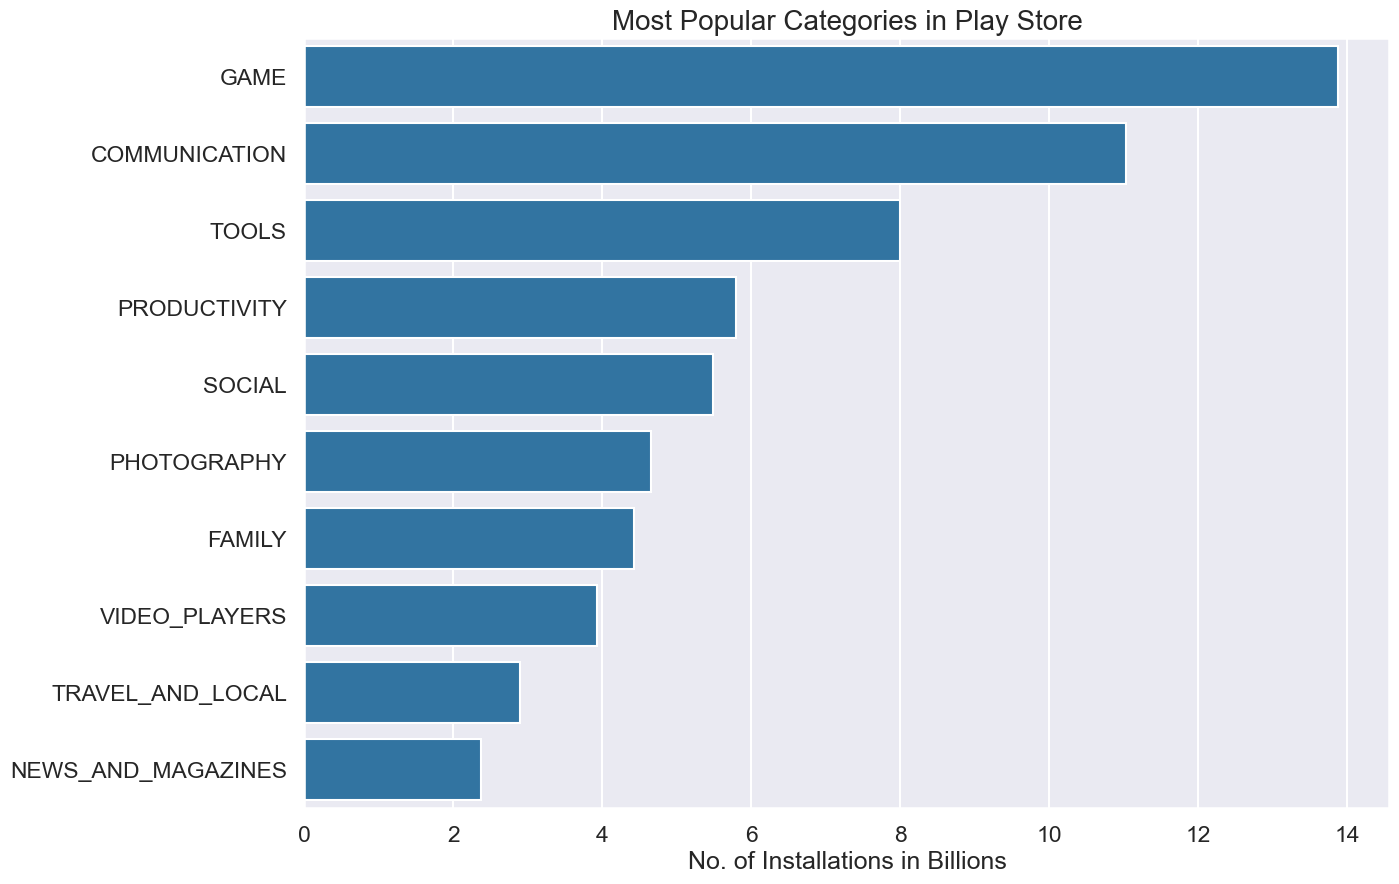

In [63]:
df_cat_installs = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

## Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 35 Billion Installations GAME is the most popular Category in Google App store

## What are the Top 5 most installed Apps in Each popular Categories ??

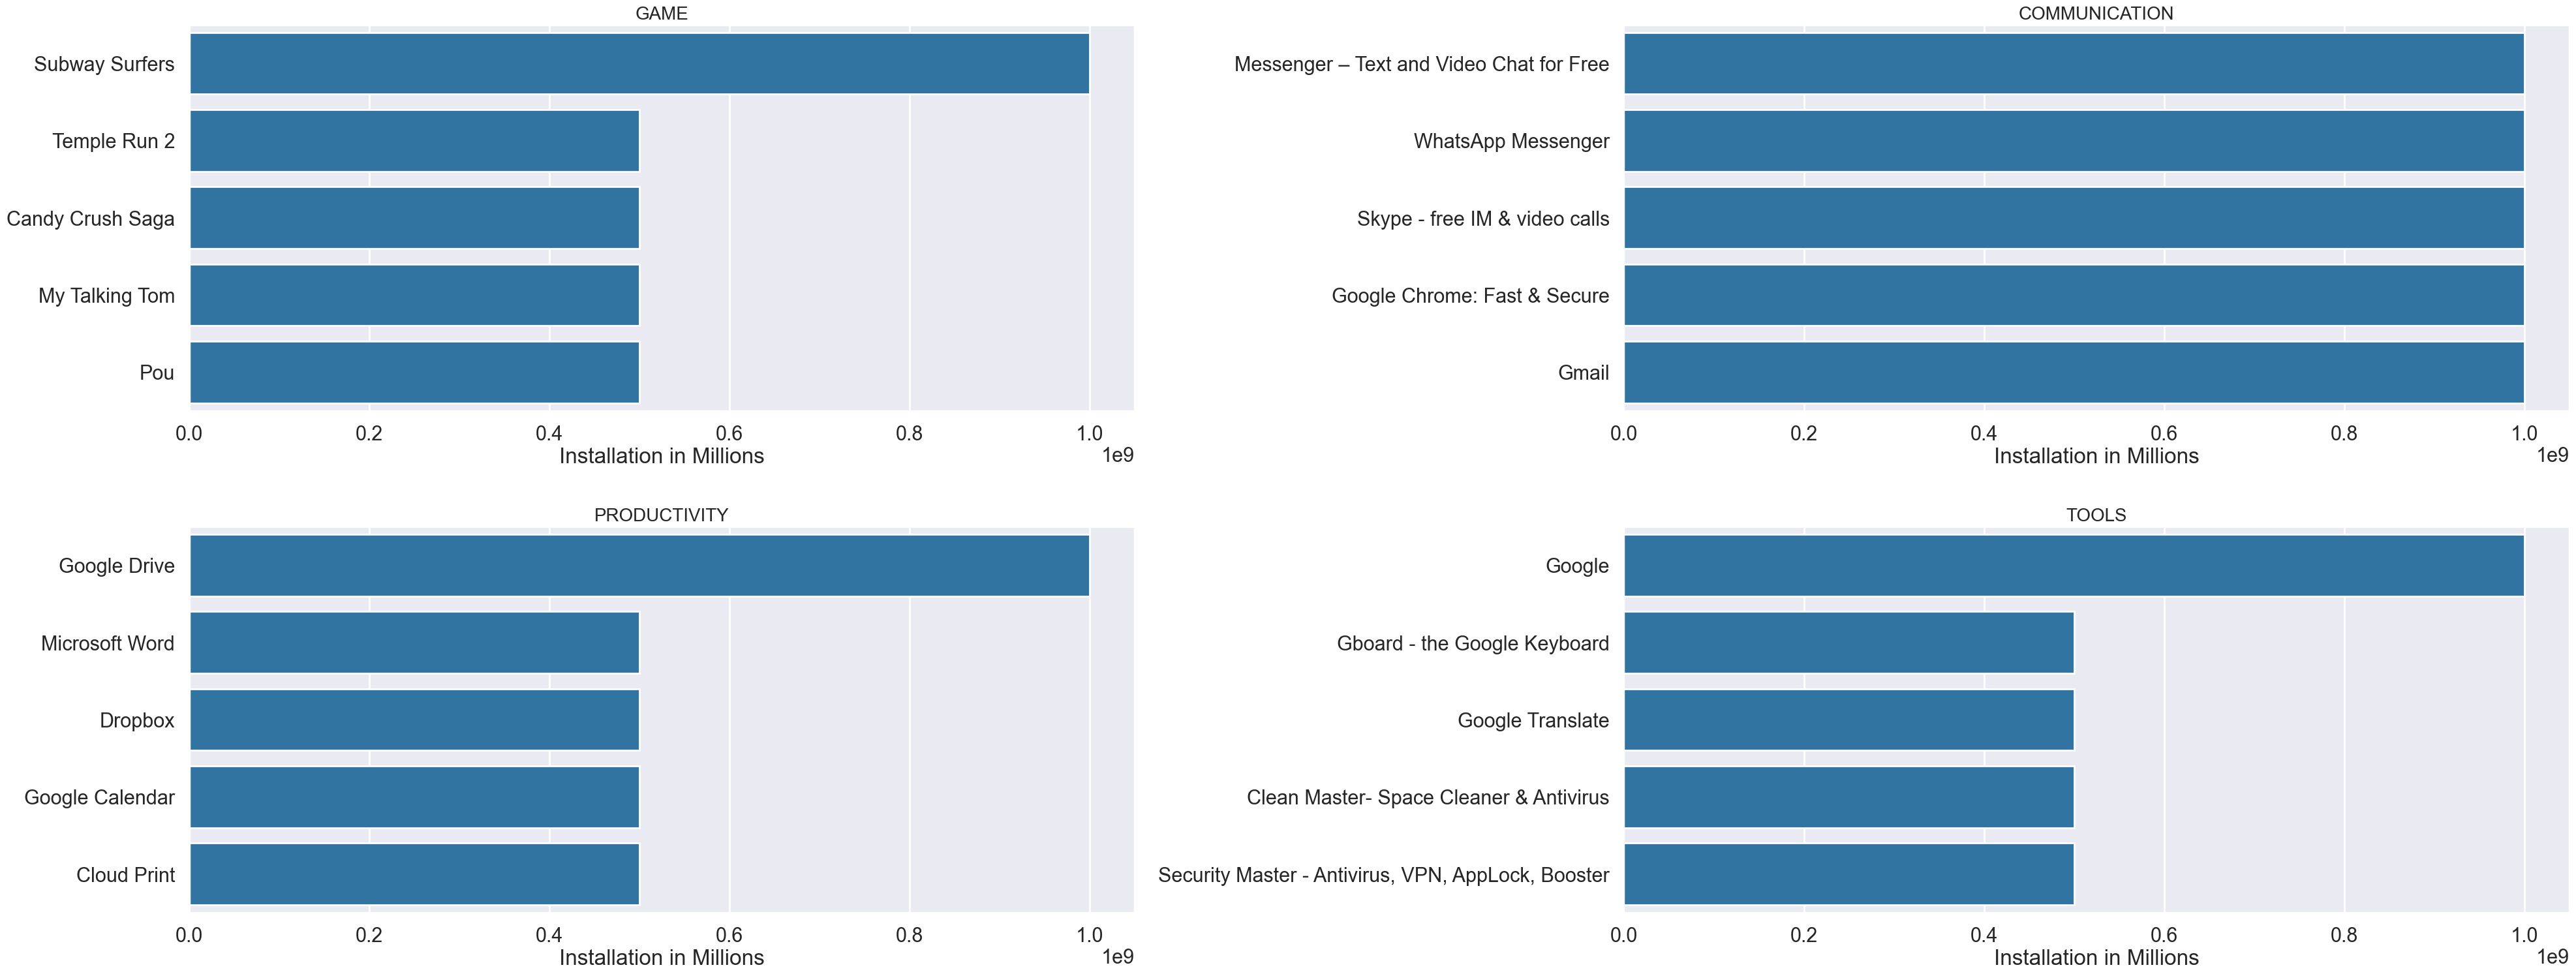

In [64]:
dfa = df.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'TOOLS' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

## How many apps are there on Google Play Store which get 5 ratings??

In [65]:
rating = df.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()

toprating_apps = rating[rating.Rating == 5.0]
print("Number of 5 rated apps",toprating_apps.shape[0])
toprating_apps.shape

Number of 5 rated apps 271


(271, 4)

## Result
- There are 271 five rated apps on Google Play store
- Top most is 'CT Brain Interpretation' from 'Family' Category

In [66]:
df.head()

,App,Category,Rating,Reviews,Size_KB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15.0,1.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1.0,8.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8.0,6.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20.0,6.0,2018.0
